In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# import simulated data
data_simulated = pd.read_csv('./ECG_data/SimulatedECG.txt', sep=" ", header=1)
data_simulated.columns = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']

In [7]:
# import measured data
data_measured = pd.read_csv('./ECG_data/MeasuredECG.txt', sep=" ", header=1)
data_measured.columns = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']

<IPython.core.display.Javascript object>


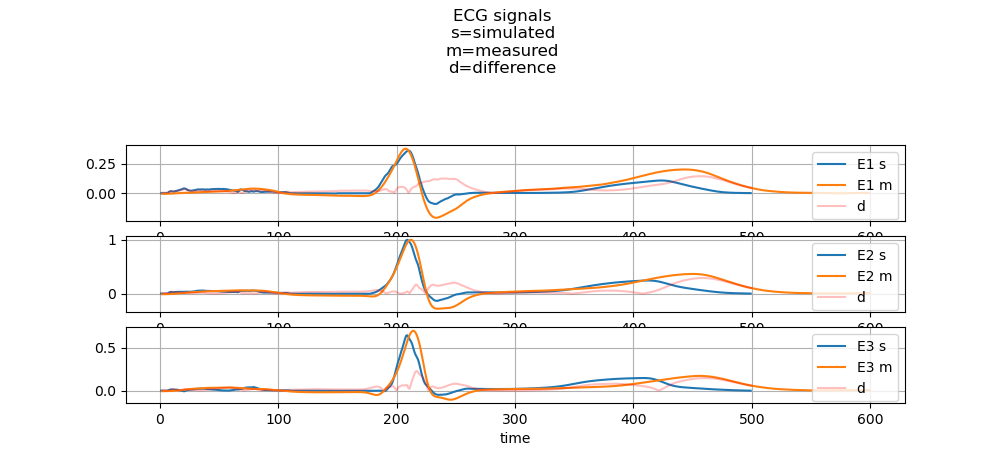

In [70]:
%matplotlib notebook
#fig = plt.figure(figsize=(8.5, 10.5))
fig = plt.figure()
fig.suptitle('ECG signals\ns=simulated\nm=measured\nd=difference')

header = ['time', 'E1', 'E2', 'E3', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6']
#l = len(header)
l = 4
for i in range(l):
    if header[i] == 'time': continue

    fig.add_subplot(l, 1, i + 1)
    plt.plot(data_simulated['time'], data_simulated[header[i]], label=header[i] + ' s')
    plt.plot(data_measured['time'], data_measured[header[i]], label=header[i] + ' m')
    plt.plot(data_measured['time'], abs(data_simulated[header[i]] - data_measured[header[i]]), c='r', alpha=.25, label='d')
    plt.grid()
    plt.legend(loc='upper right')

plt.xlabel('time')
plt.show()

# first w/o sums
This is only partly correct, as we calculate the coefficients at only one point

We want to receive the following coefficients $a_{1i}$ and $a_{2i}$:

$$
\newcommand\mycolv[1]{\begin{bmatrix}#1\end{bmatrix}}
W = < | \dot{\vec{y}}(t) - \sum_i \mycolv{{a_{1i}\Phi_i(y_1,y_2)}\\{a_{2i}\Phi_i(y_1,y_2)}}|^2> != Min.
$$

Which is as example for $i=2$:

$$
W = < | \mycolv{y_1(t) \\ \dot{y_1}(t)} - \mycolv{{a_{11}\Phi_1(y_1,y_2)}\\{a_{21}\Phi_1(y_1,y_2)}} - \mycolv{{a_{12}\Phi_2(y_1,y_2)}\\{a_{22}\Phi_2(y_1,y_2)}} |^2> \\= < | \mycolv{y_1(t) - {a_{11}\Phi_1(y_1,y_2)} - {a_{12}\Phi_2(y_1,y_2)} \\ \dot{y_1}(t) - {a_{21}\Phi_1(y_1,y_2)} - {a_{22}\Phi_2(y_1,y_2)}} |^2> \\= <\sqrt{(y_1(t) - {a_{11}\Phi_1(y_1,y_2)} - {a_{12}\Phi_2(y_1,y_2)})^2 + (\dot{y_1}(t) - {a_{21}\Phi_1(y_1,y_2)} - {a_{22}\Phi_2(y_1,y_2)})^2}>
$$
<!-- % sqrt{(y - a*p -b*q)^2 + (y - c*p - d*q)^2 -->

We achieve that by setting the derivate $W$ after $a_{ji}$ zero:

$$
\frac{\partial W}{\partial a_{ji}} != 0
$$

In case of $i=2$:

For $\frac{\partial W}{\partial a_{11}}$:

<!-- solve -(p*(-p*a+y-b*q))/sqrt((-p*a+y-b*q)^2+(z-d*q-c*p)^2) for a -->

$$
\frac{\partial W}{\partial a_{11}} = -\dfrac{\Phi_1(y_1,y_2)\cdot\left(-\Phi_1(y_1,y_2)a_{11}+y_1(t)-a_{12}\Phi_2(y_1,y_2)\right)}{\sqrt{\left(-\Phi_1(y_1,y_2)a_{11}+y_1(t)+a_{12}\Phi_2(y_1,y_2)\right)^2+\left(\dot{y_1}(t)-a_{22}\Phi_2(y_1,y_2)-a_{21}\Phi_1(y_1,y_2)\right)^2}} != 0
$$

So we solve for $a_{11}$:

$$
a_{11} = \frac{y_1 - a_{12} \cdot \Phi_2(y_1,y_2)}{\Phi_1(y_1,y_2)}
$$

<!-- $$
% b = (y - a p)/q
a_{12} = \frac{y_1 - a_{11} \cdot \Phi_1(y_1,y_2) }{\Phi_2(y_1,y_2)}
$$ -->

And for $\frac{\partial W}{\partial a_{12}}$:

<!-- solve(q*(q*b-y+a*p))/sqrt((-q*b+y-a*p)^2+(z-d*q-c*p)^2) for b -->

$$
\frac{\partial W}{\partial a_{12}} = \dfrac{\Phi_2(y_1,y_2)\left(\Phi_2(y_1,y_2)a_{12}-y_1(t)+a_{11}\Phi_1(y_1,y_2)\right)}{\sqrt{\left(-\Phi_2(y_1,y_2)a_{12}+y_1(t)-a_{11}\Phi_1(y_1,y_2)\right)^2+\left(\dot{y_1}(t)-a_{22}\Phi_2(y_1,y_2)-a_{21}\Phi_1(y_1,y_2)\right)^2}} != 0
$$

Solving for $a_{12}$:

$$
a_{12} = \frac{y_1 - a_{11}\cdot\Phi_1(y_1,y_2)}{\Phi_2(y_1,y_2)}
$$

Thirdly for $\frac{\partial W}{\partial a_{21}}$:

<!-- solve (p*(p*c-z+d*q))/sqrt((-p*c+z-d*q)^2+(y-b*q-a*p)^2) for c -->

$$
\frac{\partial W}{\partial a_{21}} = \dfrac{\Phi_1(y_1,y_2)\left(\Phi_1(y_1,y_2)a_{21}-\dot{y_1}(t)+a_{22}\Phi_2(y_1,y_2)\right)}{\sqrt{\left(-\Phi_1(y_1,y_2)a_{21}+\dot{y_1}(t)-a_{22}\Phi_2(y_1,y_2)\right)^2+\left(y_1(t)-a_{12}\Phi_2(y_1,y_2)-a_{11}\Phi_1(y_1,y_2)\right)^2}} != 0
$$

Solving this for $a_{21}$:

$$
a_{21} = \frac{\dot{y}(t) - a_{22}\Phi_2(y_1,y_2)}{\Phi_1(y_1,y_2)}
$$

Lastly calculating $\frac{\partial W}{\partial a_{22}}$:

<!-- solve (q*(q*d-z+c*p))/sqrt((-q*d+z-c*p)^2+(y-b*q-a*p)^2) for d -->

$$
\frac{\partial W}{\partial a_{22}} = \dfrac{\Phi_2(y_1,y_2)\left(\Phi_2(y_1,y_2)a_{22}-\dot{y_1}(t)+a_{21}\Phi_1(y_1,y_2)\right)}{\sqrt{\left(-\Phi_2(y_1,y_2)a_{22}+\dot{y_1}(t)-a_{21}\Phi_1(y_1,y_2)\right)^2+\left(y_1(t)-a_{12}\Phi_2(y_1,y_2)-a_{11}\Phi_1(y_1,y_2)\right)^2}} != 0
%(q*(q*d-z+c*p))/sqrt((-q*d+z-c*p)^2+(y-b*q-a*p)^2)
$$

Solving this for $a_{22}$:

$$
a_{22} = \frac{\dot{y}(t) - a_{21}\Phi_1(y_1,y_2)}{\Phi_2(y_1,y_2)}
$$

We receive a system of equations:

$$
a_{11} = \frac{y_1 - a_{12} \cdot \Phi_2(y_1,y_2)}{\Phi_1(y_1,y_2)}
a_{12} = \frac{y_1 - a_{11} \cdot \Phi_1(y_1,y_2)}{\Phi_2(y_1,y_2)}
a_{21} = \frac{\dot{y}(t) - a_{22}\Phi_2(y_1,y_2)}{\Phi_1(y_1,y_2)}
a_{22} = \frac{\dot{y}(t) - a_{21}\Phi_1(y_1,y_2)}{\Phi_2(y_1,y_2)}
$$

$$
\begin{pmatrix}
a_{11} \\
a_{12} \\
a_{21} \\
a_{22}
\end{pmatrix}
=
\begin{pmatrix}
\frac{y_1(t)}{\Phi_1(y_1,y_2)} \\
\frac{y_1(t)}{\Phi_2(y_1,y_2)} \\
\frac{\dot{y_1}(t)}{\Phi_1(y_1,y_2)} \\
\frac{\dot{y_1}(t)}{\Phi_1(y_2,y_2)} \\
\end{pmatrix}
+
\begin{pmatrix}
0 & -1 & 0 & 0 \\
-1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 \\
0 & 0 & -1 & 0
\end{pmatrix}
\cdot
\begin{pmatrix}
a_{11} \\
a_{12} \\
a_{21} \\
a_{22}
\end{pmatrix}
\cdot
\begin{pmatrix}
\frac{\Phi_2(y_1,y_2)}{\Phi_1(y_1,y_2)} \\
\frac{\Phi_1(y_1,y_2)}{\Phi_2(y_1,y_2)} \\
\frac{\Phi_2(y_1,y_2)}{\Phi_1(y_1,y_2)} \\
\frac{\Phi_1(y_1,y_2)}{\Phi_2(y_1,y_2)} \\
\end{pmatrix}
$$

<!-- y_1 -> y

doty-> z

a11 -> a

a12 -> b

a21 -> c

a22 -> d

Phi1-> p

Phi2-> q

sqrt((y - a * p - b * q)^2 + (z - c * p - d * q)^2) -->

# secondly as Andreas intended

With $n$ dimensions. We want to find a function $f$ to fit the series depending on a vector $\vec{p}$. We choose $f(y_i,\dot{y}_i;\vec{p})=p_0\cdot y+p_1 \cdot \dot{y} + p_2 \cdot y^2 + p_3 \cdot y \cdot \dot{y} + p_4 \cdot \dot{y}^2$ where the dataset $\{y, \dot{y}\}$ is the one we want $f$ to be fitted to.

$$
\frac{1}{n} \sum_i^n(f(y_i,\dot{y}_i;\vec{p})-z_i)^2 = Min.
$$

Which is equivalent to:

$$
\frac{\partial}{\partial p_k}\sum_i^n(f(y_i,\dot{y}_i;\vec{p})-z_i)^2=\sum_i^n(f(y_i,\dot{y}_i;\vec{p})-z_i)\frac{\partial}{\partial p_k}f(y_i,\dot{y}_i;\vec{p})=0
$$

Which yields a system of equations. Written in $A\cdot p=b$:

$$
\begin{pmatrix}
\sum_i^n y_i^2 & \sum_i^n y_i \dot{y}_i & \sum_i^n y_i^3 & \sum_i^n y_i^2 \dot{y}_i & \sum_i^n y_i \dot{y}_i^2 \\
\sum_i^n y_i \dot{y}_i & \sum_i^n \dot{y}_i^2 & \sum_i^n y_i^2 \dot{y}_i & \sum_i^n y_i \dot{y}_i^2 & \sum_i^n \dot{y}_i^3 \\
\sum_i^n y_i^3 & \sum_i^n y_i^2 \dot{y}_i & \sum_i^n y_i^4 & \sum_i^n y_i^3 \dot{y}_i & \sum_i^n y_i^2 \dot{y}_i^2 \\
\sum_i^n y_i^2 \dot{y}_i & \sum_i^n y_i \dot{y}_i^2 & \sum_i^n y_i^3 \dot{y}_i & \sum_i^n y_i^2 \dot{y}_i^2 & \sum_i^n y_i \dot{y}_i^3 \\
\sum_i^n y_i \dot{y}_i^2 & \sum_i^n \dot{y}_i^3 & \sum_i^n y_i^2 \dot{y}_i^2 & \sum_i^n y_i \dot{y}_i^3 & \sum_i^n y_i \dot{y}_i^4 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
p_0 \\
p_1 \\
p_2 \\
p_3 \\
p_4 \\
\end{pmatrix}
=
\begin{pmatrix}
\sum_i^n z_i y_i \\
\sum_i^n z_i \dot{y}_i \\
\sum_i^n z_i y_i^2 \\
\sum_i^n z_i y_i \dot{y}_i \\
\sum_i^n z_i \dot{y_i}^2 \\
\end{pmatrix}
$$

Solvibng for $\vec{p}$ yields:

$$
\vec{p} = A^{-1} \cdot b
$$

where $A^{-1}_{ij} = \frac{\alpha_{ij}}{|A|}$ and $\alpha_{ij}$ are the elements of the adjoint matrix $A_{ad}$.

Applying to ECG series using this snippet:

In [20]:
def solve_eqs_for_p(y, ydot, z):
    a = [[np.sum(y ** 2), np.sum(y * ydot), np.sum(y ** 3), np.sum(y ** 2 * ydot), np.sum(y * ydot ** 2)],
         [np.sum(y * ydot), np.sum(ydot ** 2), np.sum(y ** 2 * ydot), np.sum(y * ydot ** 2), np.sum(ydot ** 3)],
         [np.sum(y ** 3), np.sum(y ** 2 * ydot), np.sum(y ** 4), np.sum(y ** 3 * ydot), np.sum(y ** 2 * ydot ** 2)],
         [np.sum(y ** 2 * ydot), np.sum(y * ydot ** 2), np.sum(y ** 3 * ydot), np.sum(y ** 2 * ydot ** 2), np.sum(y * ydot ** 3)],
         [np.sum(y * ydot ** 2), np.sum(ydot ** 3), np.sum(y ** 2 * ydot ** 2), np.sum(y * ydot ** 3), np.sum(y * ydot ** 4)]
        ]
    b = [[np.sum(z * y)],
         [np.sum(z * ydot)],
         [np.sum(z * y ** 2)],
         [np.sum(z * y * ydot)],
         [np.sum(z * ydot ** 2)]
        ]
    
    print(np.array(a))
    print(np.array(b))
    
    return np.linalg.solve(a, b)

In [99]:
o = solve_eqs_for_p(data_simulated['E1'][:-1], np.diff(data_simulated['E1']), data_simulated['E1'][:-1])

[[ 3.00417963e+00 -9.29913004e-03  6.86172381e-01 -2.72318440e-03
   2.82280919e-03]
 [-9.29913004e-03  1.85992204e-02 -2.72318440e-03  2.82280919e-03
  -2.98873425e-04]
 [ 6.86172381e-01 -2.72318440e-03  1.99572290e-01 -9.56422302e-04
   6.69593041e-04]
 [-2.72318440e-03  2.82280919e-03 -9.56422302e-04  6.69593041e-04
  -5.11172898e-05]
 [ 2.82280919e-03 -2.98873425e-04  6.69593041e-04 -5.11172898e-05
   2.15732002e-06]]
[[ 3.00417963e+00]
 [-9.29913004e-03]
 [ 6.86172381e-01]
 [-2.72318440e-03]
 [ 2.82280919e-03]]


In [100]:
o

array([[ 1.00000000e+00],
       [-1.03228744e-15],
       [ 2.61679934e-15],
       [-6.32907914e-16],
       [-7.76163630e-14]])

<IPython.core.display.Javascript object>


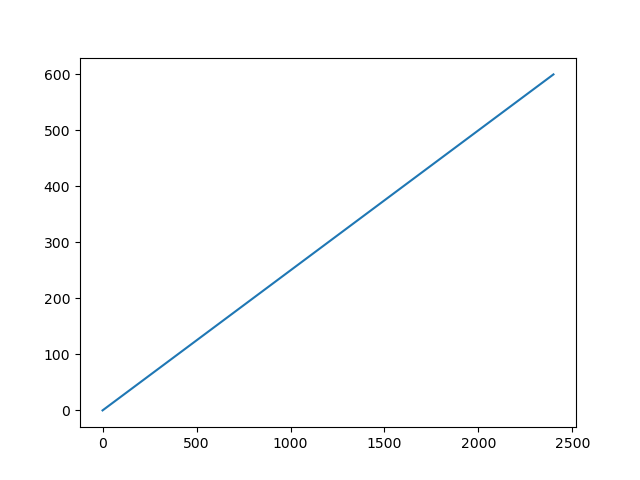

In [98]:
%matplotlib notebook
f = lambda y, ydot, p: p[0] * y + p[1] * ydot + p[2] * y ** 2 + p[3] * y * ydot + p[4] * ydot ** 2

y = np.linspace(0, 600, 2400)
ydot = y

plt.plot(f(y, ydot, o))